   Disease  bloody_stools  fecal_leakage  swelling  dizziness  confusion  \
0  Malaria              1              0         0          0          0   
1  Malaria              0              0         0          0          0   
2  Malaria              1              0         0          0          0   
3  Malaria              1              0         0          0          0   
4  Malaria              1              0         0          0          0   

   fatigue  itching  vomiting  arm_pain  ...  muscle_cramps  muscle_spasm  \
0        0        0         1         0  ...              0             0   
1        0        0         1         0  ...              0             0   
2        0        0         0         0  ...              0             0   
3        0        0         1         0  ...              0             0   
4        0        0         1         0  ...              0             0   

   yawning  rash  back_pain  anal_bleeding  lump_anus  cold  skin_rash  \
0     

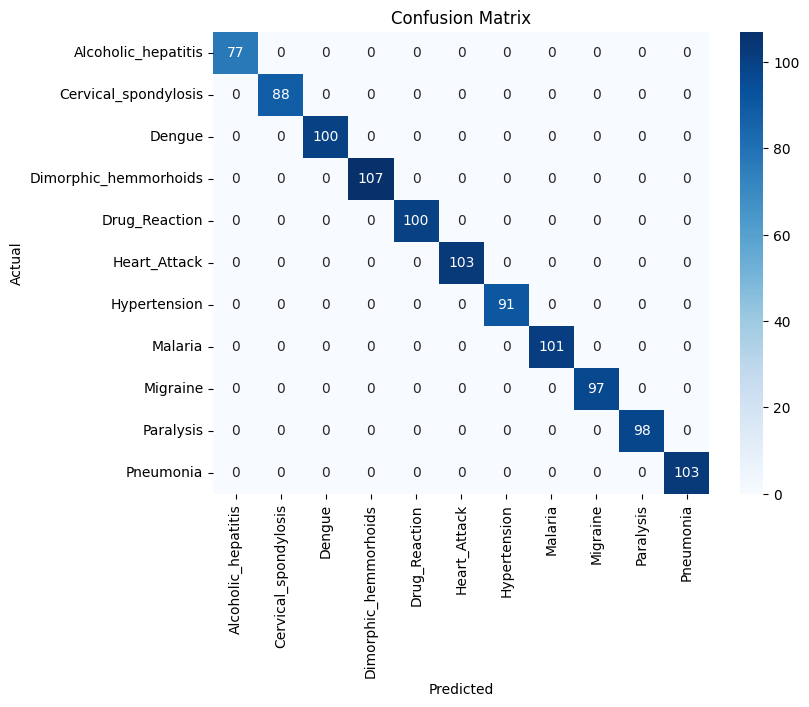

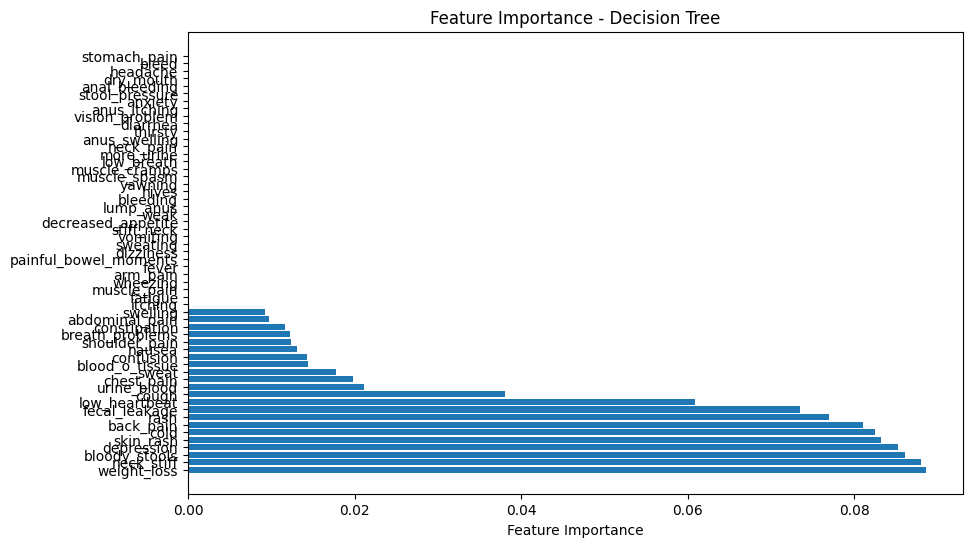

['DiseasePrediction(Dec)']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

df = pd.read_csv('/Users/pragatindu/Downloads/AI-MedDiagnostics-main 3/Disease_Symptoms.csv')

print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

df_cleaned = df.dropna()

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

X = df_cleaned.drop('Disease', axis=1)
y = df_cleaned['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train_scaled, y_train)

y_pred = dt_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10,6))
feature_importance = dt_classifier.feature_importances_
indices = np.argsort(feature_importance)[::-1]
features = X.columns
plt.barh(range(len(indices)), feature_importance[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()

joblib.dump(dt_classifier, 'decision_tree_model.pkl')
joblib.dump(scaler, 'DiseasePrediction(Dec)')
